<a href="https://colab.research.google.com/github/Mezirix/AIDA-Saskpoly/blob/main/Christiantus_Logistic_Regression_Classwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd # Import the pandas library and assign it to the alias 'pd'
from sklearn.preprocessing import StandardScaler # Import the StandardScaler class from the sklearn.preprocessing module
import seaborn as sns # Import the seaborn library and assign it to the alias 'sns'

In [ ]:
# Upload Dataset
read_csv = pd.read_csv
diabetes_df = pd.read_csv("/content/diabetes.csv")
diabetes_df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Exploration of Dataset

In [ ]:
# Statistical Description of Data
Statistics= diabetes_df.describe()
print("Statistical Description of Data")
print(Statistics)
print()


# Count Missing Values
missing_values = diabetes_df.isnull().sum()
print("Count Missing Values")
print(missing_values)
print()

# Check Data Types
data_types = diabetes_df.dtypes
print("Check Data Types")
print(data_types)
print()

# Check Data Types
data_types = diabetes_df.dtypes
print("Check Data Types")
print(data_types)
print()

# Check Data Shape
data_shape = diabetes_df.shape
print("Check Data Shape")
print(data_shape)
print()





Statistical Description of Data
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min

# Features and Target Preparation

In [ ]:
# Prepare Independent variables- features (X) and Dependent variables -Target (Y)
X = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<ipython-input-27-870660997585>:5: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  logistic_model.fit(X_train, y_train.ravel())
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.7467532467532467

Confusion Matrix:
 [[78 21]
 [18 37]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



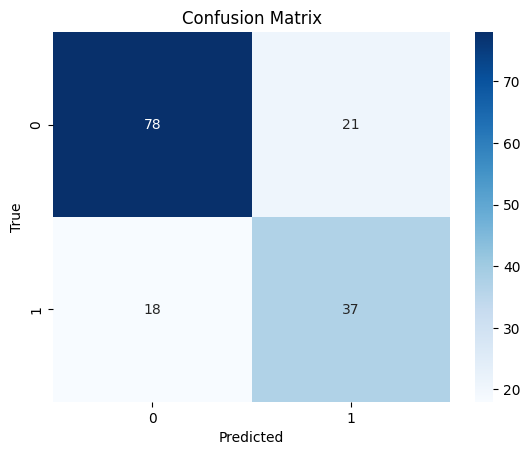

In [ ]:


# Create a Logistic Regression model
logistic_model = LogisticRegression()

# Fit the model to the training data
logistic_model.fit(X_train, y_train.ravel())

# Make predictions on the test data
y_pred = logistic_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

# Plot Heat Map
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


# Determining the importance of Features

<Axes: ylabel='Feature'>

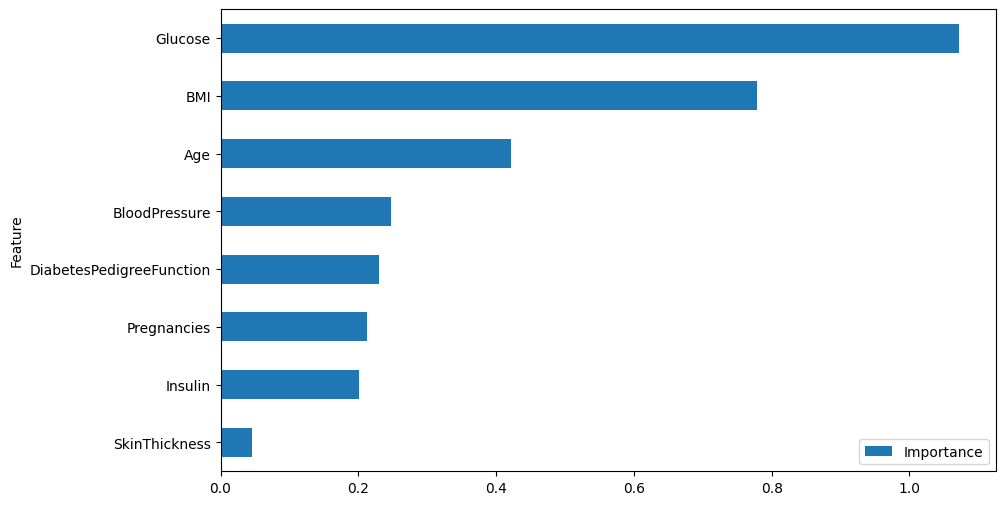

In [ ]:
#Scalar Normalization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train, y_train)


coefficients = model.coef_[0]

feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

# Selection of most important Features

In [ ]:

# Most important features selected
selected_features = ['Glucose', 'BMI', 'Age', 'BloodPressure']

# Subset the dataset to include only the selected features
X_subset = X[selected_features]  # Ensure these features are present in X

# Perform feature selection with RFE
base_estimator = LogisticRegression()
rfe = RFE(estimator=base_estimator, n_features_to_select=4)  # Number of features to select
rfe.fit(X_subset, y)

# Transform the dataset to the selected features
X_selected = rfe.transform(X_subset)

# Retrieve the selected features
selected_feature_mask = rfe.get_support()  # Boolean mask for selected features
selected_features = X_subset.columns[selected_feature_mask]
print(f"Selected features: {', '.join(selected_features)}")


Selected features: Glucose, BMI, Age, BloodPressure


In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.01)  # Adjust alpha as necessary

# Assuming 'X' contains your feature data and 'y' your target variable
lasso.fit(X, y)  # Changed x1 to X and y1 to y

# Get the selected features (non-zero coefficients)
selected_features = X.columns[lasso.coef_ != 0]
print(f"Selected features using Lasso: {', '.join(selected_features)}")

Selected features using Lasso: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age


Accuracy: 0.75

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.81      0.80        99
           1       0.65      0.64      0.64        55

    accuracy                           0.75       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154


Confusion Matrix:
[[80 19]
 [20 35]]


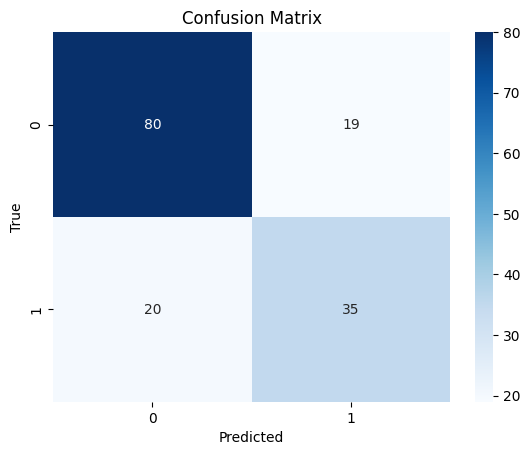

In [ ]:

df = diabetes_df

# Check if the required columns exist in the DataFrame
required_columns = ['Glucose', 'BMI', 'Age', 'BloodPressure', 'Outcome']
if not all(col in df.columns for col in required_columns):
    raise ValueError(f"The DataFrame must contain the following columns: {', '.join(required_columns)}")

# Selecting subset of features
selected_features = ['Glucose', 'BMI', 'Age', 'BloodPressure']
X1 = df[selected_features]
y1 = df['Outcome']

# Normalize the features
scaler = StandardScaler()
X1_normalized = scaler.fit_transform(X1)

# Split the dataset into training and testing sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1_normalized, y1, test_size=0.2, random_state=42)

# Initialize Logistic Regression model
model = LogisticRegression()

# Train the model
model.fit(X1_train, y1_train)

# Predict on the test set
y1_pred = model.predict(X1_test)

# Evaluate the model
accuracy = accuracy_score(y1_test, y1_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y1_test, y1_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y1_test, y1_pred))

# Plot Heat Map
sns.heatmap(confusion_matrix(y1_test, y1_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


# Analysis of results, Comparison &  Conclusion

**First Model**
The Model Accuracy was 74.67%
From the confusion matrix
•	Correctly predicted 78 instances of Class 0 and 37 instances of Class 1.
•	Misclassified 21 instances of Class 0 as Class 1 and 18 instances of Class 1 as Class 0.


**Model with Selected Features**
The Model Accuracy was 75%
From the confusion matrix
•	Correctly predicted 80 instances of Class 0 and 35 instances of Class 1.
•	Misclassified 19 instances of Class 0 as Class 1 and 20 instances of Class 1 as Class 0.

**CONCLUSION:**

With a few minor exceptions, both models performed similarly. The model with the selected features performs marginally better at reducing false positives. While the first Model performs better at detecting true positives. In conclusion, there is no clear performance benefit to either model, the desired application may determine which one is best.
